**First run this cell:**

In [2]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell but run it

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image,display

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import pandas as pd
import seaborn as sns
import numpy as np
import pylab as plt

## In class 1 (challenging).
- Read a csv file (DONE)
- Create an empty list (DONE)
- Loop over the column names of the dataframe, convert the column name to lowercase (.lower()) and append it to the empty list
- Make the new columns

In [ ]:
#import pandas as pd
import pandas as pd

df_alcohol = pd.read_csv("data/alcohol.csv",sep="\t")
df_alcohol.head()

In [ ]:
df_alcohol.columns

In [ ]:
#Create an empty list
new_columns = []

In [ ]:
#Loop over the columns
for ............. in ...........:
    #Convert the name to lower case
    new_name = ..........lower()
    #Append it to the list of new_columns
    ...........

In [ ]:
#Change the column names of the dataframe with new_columns
........... = new_columns

In [ ]:
#Just to check if it's right
df_alcohol.head()

---

## In class 2
- Make two groups, income greater than the mean and smaller than the means (pd.cut)
- Make three groups, adults = 1, adults 2, adults >3
- Visualize the differences between the two groups with a barplot
- Visualize the relationship with a contingency table

In [4]:
df_alcohol = pd.read_csv("data/alcohol.csv",sep="\t")
df_alcohol.columns = ["adults","kids","income","consume"]
df_alcohol.head()

,adults,kids,income,consume
0,2,2,758,1
1,2,3,1785,1
2,3,0,1200,1
3,1,0,545,1
4,4,1,547,1


In [17]:
#Find the mean. We do it by using the function "mean" from the numpy package.
#np.mean() calculates the mean of whatever it is in parenthesis
#df_alcohol["income"] is the column with the income
mean_income = np.mean(df_alcohol["income"])

#I'm also calculating the max to know what's the maximum income
max_income = np.max(df_alcohol["income"])
mean_income,max_income

(649.528, 3846)

In [18]:
#Find the possible options for adults (DONE, just run it)
set(df_alcohol["adults"])

{1, 2, 3, 4, 5, 6}

In [19]:
#Make the two groups for income. This will make two 
df_alcohol["groups_income"] = pd.cut(df_alcohol["income"],[0,mean_income,3846])

In [20]:
#Make three groups for adults
#[0,1,2,10] to make groups (0,1], (1,2], (2,10)
df_alcohol["groups_adults"] = pd.cut(df_alcohol["adults"],[0,1,2,10])

In [21]:
df_alcohol.head()

,adults,kids,income,consume,groups_income,groups_adults
0,2,2,758,1,"(649.528, 3846.0]","(1, 2]"
1,2,3,1785,1,"(649.528, 3846.0]","(1, 2]"
2,3,0,1200,1,"(649.528, 3846.0]","(2, 10]"
3,1,0,545,1,"(0.0, 649.528]","(0, 1]"
4,4,1,547,1,"(0.0, 649.528]","(2, 10]"


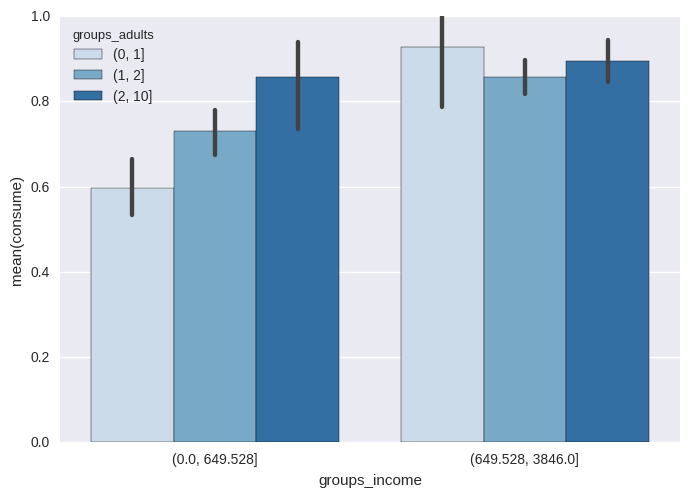

In [22]:
#Make the barplot
#There are many ways to make this plot. For example, let's analyze the relationship between the number of adults and alcohol consumption for the two groups of income.
#Because we are mainly interested in the within variation (the changes in alcohol consumption within the groups of income), we use "group_adults" as hue, and "groups_income" as x.
#We observe that for the lower income, having more adults increase the likelihood of alcohol consumption. 
#This correlation may be due to different characteristics in the household that we are not controlling (number of children), as we see in the next exercise
sns.barplot(x="groups_income",y="consume",hue="groups_adults",data=df_alcohol,palette="Blues")

## In class 3
- Keep the rows with only one kid
- Do the same visualization (barplot) with this small dataset


In [25]:
#Make both conditions
condition = df_alcohol["kids"] == 1

In [27]:
#Keep the rows satisfying the condition and the columns "adults" and "kids"
df_alcohol_1kid = df_alcohol.loc[condition,:]
df_alcohol_1kid.head()

,adults,kids,income,consume,groups_income,groups_adults
4,4,1,547,1,"(0.0, 649.528]","(2, 10]"
8,2,1,763,1,"(649.528, 3846.0]","(1, 2]"
19,2,1,607,1,"(0.0, 649.528]","(1, 2]"
23,3,1,843,1,"(649.528, 3846.0]","(2, 10]"
26,2,1,709,1,"(649.528, 3846.0]","(1, 2]"


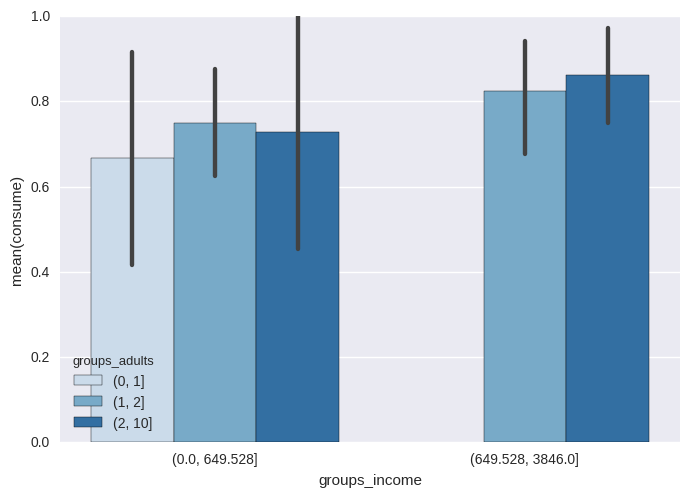

In [28]:
#Make the barplot
#When we control by the number of children (just focusing in the subset with only 1 kid) we don't see that relationship.
sns.barplot(x="groups_income",y="consume",hue="groups_adults",data=df_alcohol_1kid,palette="Blues")

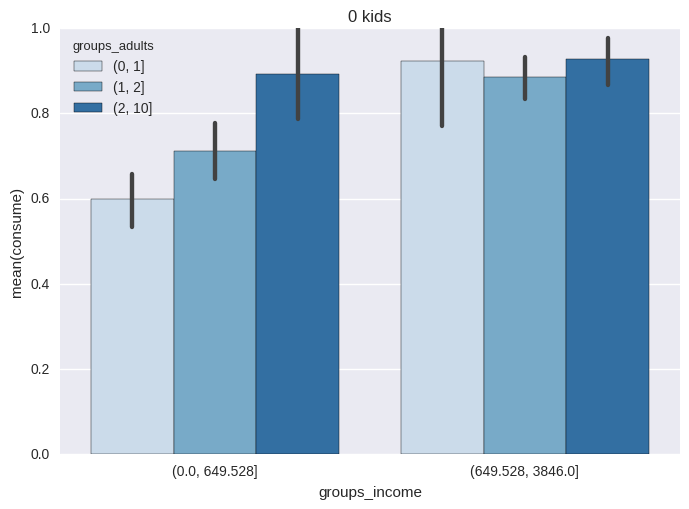

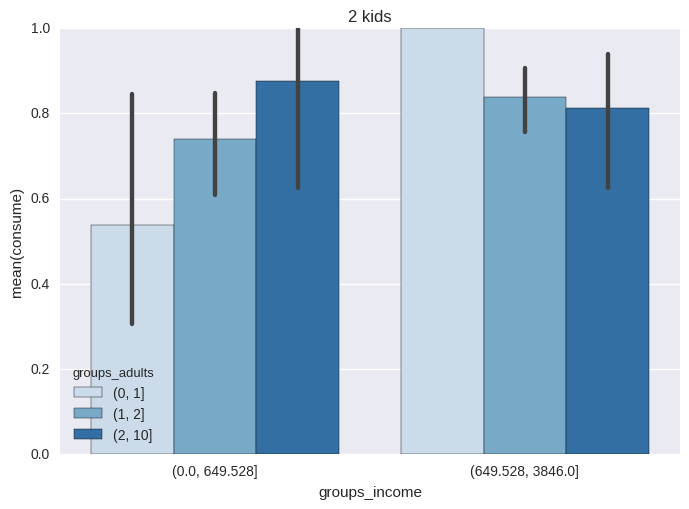

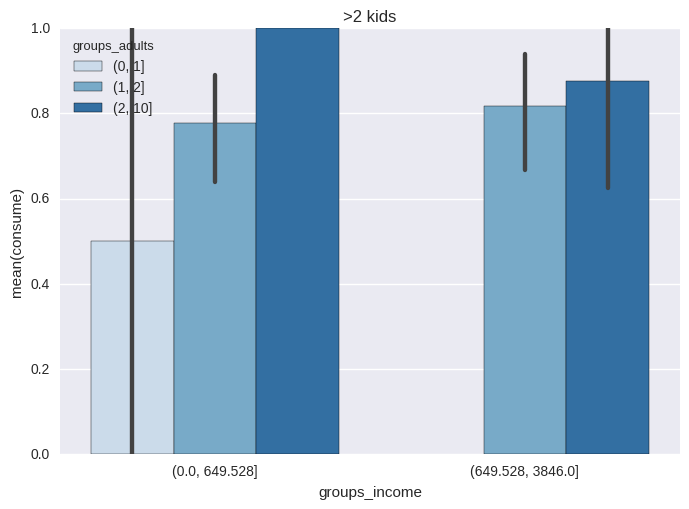

In [37]:
#However the relationship holds for other number of children
df_alcohol_0kid = df_alcohol.loc[df_alcohol["kids"]==0,:]
sns.barplot(x="groups_income",y="consume",hue="groups_adults",data=df_alcohol_0kid,palette="Blues")
plt.title("0 kids")
plt.show()

df_alcohol_2kid = df_alcohol.loc[df_alcohol["kids"]==2,:]
sns.barplot(x="groups_income",y="consume",hue="groups_adults",data=df_alcohol_2kid,palette="Blues")
plt.title("2 kids")
plt.show()


df_alcohol_l2kid = df_alcohol.loc[df_alcohol["kids"]>2,:]
sns.barplot(x="groups_income",y="consume",hue="groups_adults",data=df_alcohol_l2kid,palette="Blues")
plt.title(">2 kids")
plt.show()
